## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7        X8        X9       X10       X11       X12       X13         Y
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 



In [8]:
batch_size = 64
n_epochs = 5000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the train dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance V (1,0.01,0.1) to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.03548
0:	learn: 0.9753230	total: 47.3ms	remaining: 47.3s
1:	learn: 0.9551766	total: 48.2ms	remaining: 24s
2:	learn: 0.9344505	total: 49.1ms	remaining: 16.3s
3:	learn: 0.9164868	total: 50ms	remaining: 12.4s
4:	learn: 0.8989805	total: 50.8ms	remaining: 10.1s
5:	learn: 0.8810152	total: 51.7ms	remaining: 8.56s
6:	learn: 0.8655535	total: 52.7ms	remaining: 7.47s
7:	learn: 0.8489971	total: 53.6ms	remaining: 6.64s
8:	learn: 0.8331687	total: 54.4ms	remaining: 5.99s
9:	learn: 0.8167344	total: 55.2ms	remaining: 5.46s
10:	learn: 0.8015832	total: 56.1ms	remaining: 5.04s
11:	learn: 0.7870017	total: 56.9ms	remaining: 4.68s
12:	learn: 0.7729034	total: 57.7ms	remaining: 4.38s
13:	learn: 0.7574506	total: 58.6ms	remaining: 4.13s
14:	learn: 0.7445630	total: 59.4ms	remaining: 3.9s
15:	learn: 0.7307131	total: 60.3ms	remaining: 3.71s
16:	learn: 0.7172752	total: 61.1ms	remaining: 3.54s
17:	learn: 0.7070416	total: 62ms	remaining: 3.38s
18:	learn: 0.6941102	total: 62.7ms	remaining: 3.24s


114:	learn: 0.2849526	total: 146ms	remaining: 1.12s
115:	learn: 0.2838758	total: 147ms	remaining: 1.12s
116:	learn: 0.2828807	total: 148ms	remaining: 1.11s
117:	learn: 0.2812515	total: 149ms	remaining: 1.11s
118:	learn: 0.2801481	total: 150ms	remaining: 1.11s
119:	learn: 0.2793230	total: 151ms	remaining: 1.1s
120:	learn: 0.2780553	total: 152ms	remaining: 1.1s
121:	learn: 0.2767661	total: 152ms	remaining: 1.1s
122:	learn: 0.2755748	total: 153ms	remaining: 1.09s
123:	learn: 0.2746664	total: 154ms	remaining: 1.09s
124:	learn: 0.2737116	total: 155ms	remaining: 1.09s
125:	learn: 0.2724524	total: 156ms	remaining: 1.08s
126:	learn: 0.2709442	total: 157ms	remaining: 1.08s
127:	learn: 0.2698508	total: 158ms	remaining: 1.08s
128:	learn: 0.2687637	total: 159ms	remaining: 1.07s
129:	learn: 0.2674547	total: 160ms	remaining: 1.07s
130:	learn: 0.2663686	total: 161ms	remaining: 1.07s
131:	learn: 0.2654164	total: 162ms	remaining: 1.06s
132:	learn: 0.2644031	total: 163ms	remaining: 1.06s
133:	learn: 0.2

265:	learn: 0.1807778	total: 281ms	remaining: 774ms
266:	learn: 0.1804298	total: 282ms	remaining: 774ms
267:	learn: 0.1799543	total: 283ms	remaining: 773ms
268:	learn: 0.1796755	total: 284ms	remaining: 771ms
269:	learn: 0.1793506	total: 285ms	remaining: 770ms
270:	learn: 0.1787196	total: 285ms	remaining: 768ms
271:	learn: 0.1781836	total: 286ms	remaining: 766ms
272:	learn: 0.1778232	total: 287ms	remaining: 765ms
273:	learn: 0.1774583	total: 288ms	remaining: 763ms
274:	learn: 0.1769905	total: 289ms	remaining: 762ms
275:	learn: 0.1763088	total: 290ms	remaining: 760ms
276:	learn: 0.1758931	total: 291ms	remaining: 759ms
277:	learn: 0.1754414	total: 291ms	remaining: 757ms
278:	learn: 0.1748539	total: 292ms	remaining: 755ms
279:	learn: 0.1743168	total: 293ms	remaining: 754ms
280:	learn: 0.1738028	total: 294ms	remaining: 752ms
281:	learn: 0.1735330	total: 295ms	remaining: 751ms
282:	learn: 0.1730883	total: 296ms	remaining: 749ms
283:	learn: 0.1727397	total: 297ms	remaining: 748ms
284:	learn: 

424:	learn: 0.1283464	total: 417ms	remaining: 565ms
425:	learn: 0.1280752	total: 418ms	remaining: 564ms
426:	learn: 0.1280146	total: 419ms	remaining: 562ms
427:	learn: 0.1278224	total: 420ms	remaining: 561ms
428:	learn: 0.1274209	total: 421ms	remaining: 560ms
429:	learn: 0.1271275	total: 422ms	remaining: 559ms
430:	learn: 0.1269916	total: 422ms	remaining: 558ms
431:	learn: 0.1266786	total: 423ms	remaining: 556ms
432:	learn: 0.1263347	total: 424ms	remaining: 555ms
433:	learn: 0.1261713	total: 425ms	remaining: 554ms
434:	learn: 0.1259162	total: 426ms	remaining: 553ms
435:	learn: 0.1256621	total: 426ms	remaining: 552ms
436:	learn: 0.1255213	total: 427ms	remaining: 551ms
437:	learn: 0.1253288	total: 428ms	remaining: 549ms
438:	learn: 0.1252120	total: 429ms	remaining: 548ms
439:	learn: 0.1248711	total: 430ms	remaining: 547ms
440:	learn: 0.1247584	total: 431ms	remaining: 546ms
441:	learn: 0.1245078	total: 432ms	remaining: 545ms
442:	learn: 0.1243865	total: 433ms	remaining: 544ms
443:	learn: 

587:	learn: 0.0980345	total: 553ms	remaining: 388ms
588:	learn: 0.0978279	total: 554ms	remaining: 387ms
589:	learn: 0.0978051	total: 555ms	remaining: 386ms
590:	learn: 0.0976456	total: 556ms	remaining: 385ms
591:	learn: 0.0974717	total: 557ms	remaining: 384ms
592:	learn: 0.0974102	total: 558ms	remaining: 383ms
593:	learn: 0.0971472	total: 559ms	remaining: 382ms
594:	learn: 0.0970525	total: 559ms	remaining: 381ms
595:	learn: 0.0968496	total: 560ms	remaining: 380ms
596:	learn: 0.0966280	total: 561ms	remaining: 379ms
597:	learn: 0.0963226	total: 562ms	remaining: 378ms
598:	learn: 0.0960686	total: 563ms	remaining: 377ms
599:	learn: 0.0958865	total: 564ms	remaining: 376ms
600:	learn: 0.0956978	total: 565ms	remaining: 375ms
601:	learn: 0.0954516	total: 565ms	remaining: 374ms
602:	learn: 0.0953656	total: 566ms	remaining: 373ms
603:	learn: 0.0952005	total: 567ms	remaining: 372ms
604:	learn: 0.0950188	total: 568ms	remaining: 371ms
605:	learn: 0.0948526	total: 569ms	remaining: 370ms
606:	learn: 

753:	learn: 0.0744553	total: 694ms	remaining: 226ms
754:	learn: 0.0743668	total: 695ms	remaining: 225ms
755:	learn: 0.0741683	total: 696ms	remaining: 225ms
756:	learn: 0.0739993	total: 696ms	remaining: 224ms
757:	learn: 0.0739172	total: 697ms	remaining: 223ms
758:	learn: 0.0738574	total: 698ms	remaining: 222ms
759:	learn: 0.0737420	total: 699ms	remaining: 221ms
760:	learn: 0.0735985	total: 700ms	remaining: 220ms
761:	learn: 0.0734147	total: 701ms	remaining: 219ms
762:	learn: 0.0733130	total: 702ms	remaining: 218ms
763:	learn: 0.0732206	total: 702ms	remaining: 217ms
764:	learn: 0.0730579	total: 703ms	remaining: 216ms
765:	learn: 0.0729769	total: 704ms	remaining: 215ms
766:	learn: 0.0728091	total: 705ms	remaining: 214ms
767:	learn: 0.0727029	total: 706ms	remaining: 213ms
768:	learn: 0.0725901	total: 707ms	remaining: 212ms
769:	learn: 0.0725048	total: 708ms	remaining: 211ms
770:	learn: 0.0722923	total: 708ms	remaining: 210ms
771:	learn: 0.0722439	total: 709ms	remaining: 209ms
772:	learn: 

917:	learn: 0.0584491	total: 830ms	remaining: 74.1ms
918:	learn: 0.0583812	total: 832ms	remaining: 73.3ms
919:	learn: 0.0583358	total: 833ms	remaining: 72.4ms
920:	learn: 0.0582507	total: 834ms	remaining: 71.5ms
921:	learn: 0.0581806	total: 835ms	remaining: 70.6ms
922:	learn: 0.0580961	total: 835ms	remaining: 69.7ms
923:	learn: 0.0580280	total: 836ms	remaining: 68.8ms
924:	learn: 0.0579197	total: 837ms	remaining: 67.9ms
925:	learn: 0.0579012	total: 838ms	remaining: 67ms
926:	learn: 0.0577979	total: 839ms	remaining: 66ms
927:	learn: 0.0576793	total: 839ms	remaining: 65.1ms
928:	learn: 0.0576119	total: 840ms	remaining: 64.2ms
929:	learn: 0.0575059	total: 841ms	remaining: 63.3ms
930:	learn: 0.0574143	total: 842ms	remaining: 62.4ms
931:	learn: 0.0573958	total: 843ms	remaining: 61.5ms
932:	learn: 0.0573151	total: 844ms	remaining: 60.6ms
933:	learn: 0.0572305	total: 845ms	remaining: 59.7ms
934:	learn: 0.0571133	total: 846ms	remaining: 58.8ms
935:	learn: 0.0570343	total: 846ms	remaining: 57.9

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

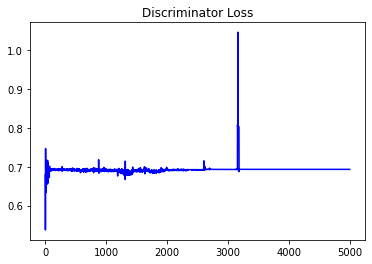

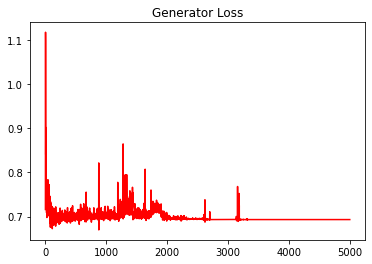

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

#### Sanity Checks 

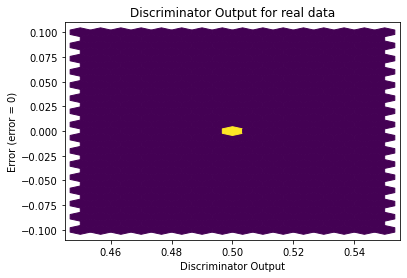

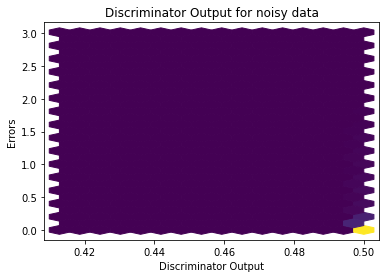

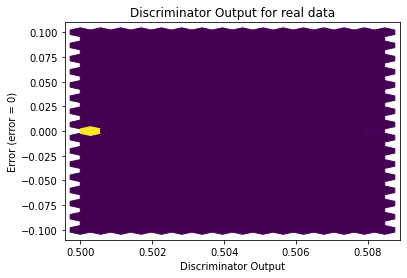

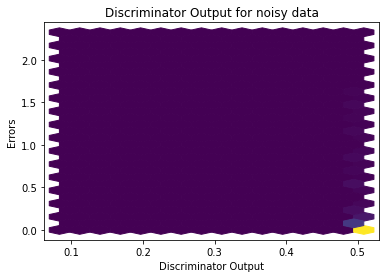

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


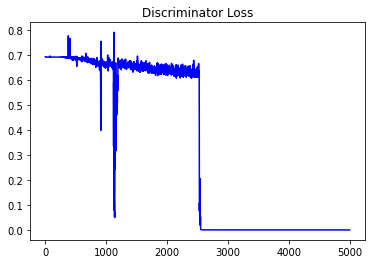

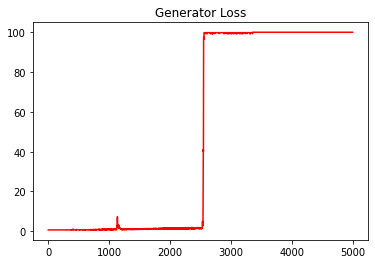

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)


In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

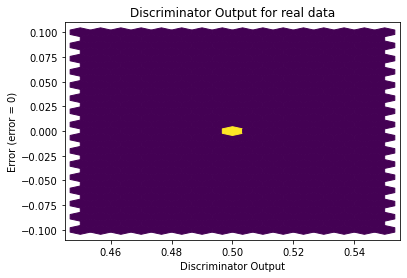

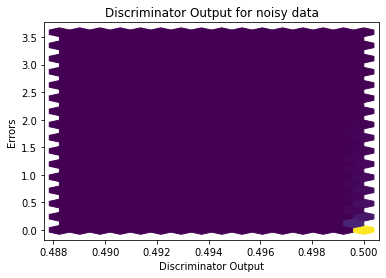

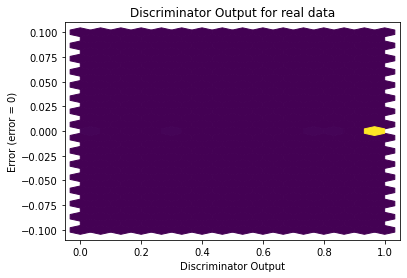

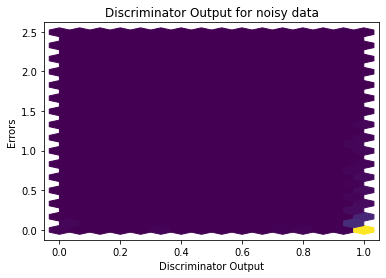

In [18]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0436]], device='cuda:0', requires_grad=True)
